# draft

In [211]:
#
# !pip install pandas_profiling

In [73]:
import pandas as pd
import pandas_profiling
from plotnine import *

## df: 새로운 열의 할당 2단계 (연쇄할당)

### 모티브

`-` 원본데이터를 가급적 손상시키지 않으면서 데이터 변형을 하고 싶음. 

In [341]:
df = pd.DataFrame({'A':range(0,5), 'B':range(1,6)})
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


복사본 생성

In [342]:
df2 = df 
df2

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [343]:
df2['C'] = (df2.A+df2.B)/2 
df2

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [350]:
df2['D'] = (df2.C - np.mean(df2.C))/np.std(df2.C)
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [351]:
df # 니가 왜 거기서 나와??

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


`-` 올바른 코드1

In [352]:
df = pd.DataFrame({'A':range(0,5), 'B':range(1,6)})
df2 = df.copy()
df2['C'] = (df2.A+df2.B)/2 
df2['D'] = (df2.C - np.mean(df2.C))/np.std(df2.C)

In [354]:
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [355]:
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


`-` 올바른 코드2 

In [364]:
df = pd.DataFrame({'A':range(0,5), 'B':range(1,6)})
mean = np.mean
std = np.std 
df.eval('C=(A+B)/2').eval('D=(C-@mean(C))/@std(C)')

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 어디까지 지원되는지 안되는지도 모르겠고, 
- 외부함수 선언하는 것도 좀 귀찮아요 

`-` 올바른 코드3 (assign) --> 실패

In [368]:
df = pd.DataFrame({'A':range(0,5), 'B':range(1,6)})
df.assign(C = (df.A+df.B)/2)

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [369]:
df.assign(C = (df.A+df.B)/2).assign(D = (df.C-np.mean(df.C))/np.std(df.C))

AttributeError: 'DataFrame' object has no attribute 'C'

아래와 같이 고쳐야함 

In [373]:
_df = df.assign(C = (df.A+df.B)/2)
_df.assign(D = (_df.C-np.mean(_df.C))/np.std(_df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 이건 우리 철학이랑 안맞음.. ㅠㅠ 

### 해결책 

두번째 assign의 df.C의 df가 current dataframe을 의미하도록 하려면 아래와 같이 lambda df: 를 추가하면된다. 

In [374]:
df.assign(C = (df.A+df.B)/2).assign(D = lambda df: (df.C-np.mean(df.C))/np.std(df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [375]:
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


`-` 연쇄할당 

In [380]:
df.assign(C= (df.A+df.B)/2).assign(D = lambda df: df.C+2).assign(E = lambda df: df.D-2) 

,A,B,C,D,E
0,0,1,0.5,2.5,0.5
1,1,2,1.5,3.5,1.5
2,2,3,2.5,4.5,2.5
3,3,4,3.5,5.5,3.5
4,4,5,4.5,6.5,4.5


## FIFA23 데이터분석

### FIFA23 data 

`-` FIFA23라는 축구게임이 있음 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 
- https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

### 데이터살펴보기 

`-` 일단 살펴보기

In [272]:
df=pd.read_csv('FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


트랜스포즈하여 보는 것이 편할때도 있음 

In [277]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659
ID,209658,212198,224334,192985,224232,212622,197445,187961,208333,210514,...,256879,269546,267647,253186,267461,269526,267946,270567,256624,256376
Name,L. Goretzka,Bruno Fernandes,M. Acuña,K. De Bruyne,N. Barella,J. Kimmich,D. Alaba,22 Paulinho,E. Can,João Cancelo,...,22 G. Leijon,Wu Fei,22 E. Grosz,22 S. Booth,22 L. Grimpe,Deng Xiongtao,22 Lim Jun Sub,A. Demir,21 S. Czajor,21 F. Jakobsson
Age,27,27,30,31,25,27,30,32,28,28,...,19,32,18,20,17,19,17,25,18,20
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png,https://cdn.sofifa.net/players/192/985/23_60.png,https://cdn.sofifa.net/players/224/232/23_60.png,https://cdn.sofifa.net/players/212/622/23_60.png,https://cdn.sofifa.net/players/197/445/23_60.png,https://cdn.sofifa.net/players/187/961/22_60.png,https://cdn.sofifa.net/players/208/333/23_60.png,https://cdn.sofifa.net/players/210/514/23_60.png,...,https://cdn.sofifa.net/players/256/879/22_60.png,https://cdn.sofifa.net/players/269/546/23_60.png,https://cdn.sofifa.net/players/267/647/22_60.png,https://cdn.sofifa.net/players/253/186/22_60.png,https://cdn.sofifa.net/players/267/461/22_60.png,https://cdn.sofifa.net/players/269/526/23_60.png,https://cdn.sofifa.net/players/267/946/22_60.png,https://cdn.sofifa.net/players/270/567/23_60.png,https://cdn.sofifa.net/players/256/624/21_60.png,https://cdn.sofifa.net/players/256/376/21_60.png
Nationality,Germany,Portugal,Argentina,Belgium,Italy,Germany,Austria,Brazil,Germany,Portugal,...,Sweden,China PR,Romania,England,Germany,China PR,Korea Republic,Turkey,Poland,Sweden
Flag,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/flags/ar.png,https://cdn.sofifa.net/flags/be.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/at.png,https://cdn.sofifa.net/flags/br.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,...,https://cdn.sofifa.net/flags/se.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/ro.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/kr.png,https://cdn.sofifa.net/flags/tr.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/se.png
Overall,87,86,85,91,86,89,86,83,82,88,...,52,51,52,51,54,48,48,51,50,50
Potential,88,87,85,91,89,90,86,83,82,88,...,62,51,70,60,68,61,64,56,65,61
Club,FC Bayern München,Manchester United,Sevilla FC,Manchester City,Inter,FC Bayern München,Real Madrid CF,Al Ahli,Borussia Dortmund,Manchester City,...,Örebro SK,Wuhan Three Towns,Gaz Metan Mediaş,Crewe Alexandra,RB Leipzig,Meizhou Hakka,Jeju United FC,Ümraniyespor,Fleetwood Town,IFK Norrköping
Club Logo,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/11/30.png,https://cdn.sofifa.net/teams/481/30.png,https://cdn.sofifa.net/teams/10/30.png,https://cdn.sofifa.net/teams/44/30.png,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/243/30.png,https://cdn.sofifa.net/teams/112387/30.png,https://cdn.sofifa.net/teams/22/30.png,https://cdn.sofifa.net/teams/10/30.png,...,https://cdn.sofifa.net/teams/705/30.png,https://cdn.sofifa.net/teams/116361/30.png,https://cdn.sofifa.net/teams/112637/30.png,https://cdn.sofifa.net/teams/121/30.png,https://cdn.sofifa.net/teams/112172/30.png,https://cdn.sofifa.net/teams/114628/30.png,https://cdn.sofifa.net/teams/1478/30.png,https://cdn.sofifa.net/teams/113796/30.png,https://cdn.sofifa.net/teams/112260/30.png,https://cdn.sofifa.net/teams/702/30.png


`-` column이름조사 

In [23]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

- 이름에 space가 있어서 좀 거슬림

`-` 각 column 별로 자료형조사

In [22]:
dtypes = [df[key].dtype for key in df.keys()]
pd.DataFrame({'colname':df.keys(),'dtype':dtypes})

,colname,dtype
0,ID,int64
1,Name,object
2,Age,int64
3,Photo,object
4,Nationality,object
5,Flag,object
6,Overall,int64
7,Potential,int64
8,Club,object
9,Club Logo,object


- Height, Weight 는 왜..? 

`-` 결측치조사 

In [21]:
number_of_na = [df[key].isna().sum() for key in df.keys()]
pd.DataFrame({'colname':df.keys(),'dtype':dtypes,'na':number_of_na})

,colname,dtype,na
0,ID,int64,0
1,Name,object,0
2,Age,int64,0
3,Photo,object,0
4,Nationality,object,0
5,Flag,object,0
6,Overall,int64,0
7,Potential,int64,0
8,Club,object,211
9,Club Logo,object,0


(퀴즈) 열의선택: 결측치가 10000개 이상인 열을 보고싶다면? 

In [83]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

,Loaned From,Best Overall Rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17655,NaN,NaN
17656,NaN,NaN
17657,NaN,NaN
17658,NaN,NaN


`-` .info()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

`-` .describe(): 숫자들이 저장된 column에 대하여 기본통계량 조사

In [221]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


`-` pandas_profiling.ProfileReport()을 이용한 전체적인 조사 

In [224]:
pandas_profiling.ProfileReport(df).to_file('fifa2023_reprot.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:73: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

`-` 특정열을 중심으로 정렬하여 보기 

In [156]:
df.sort_values(by='Overall',ascending=False,ignore_index=True)
    # 내림차순으로 정렬, 엉킨인덱스를 재정렬하여 새로운 df 생성 + old_index 버림 
# df.sort_values(by='Overall') 
    # 오름차순으로 정렬, 인덱스가 엉켜있음
# df.sort_values(by='Overall',ascending=False) 
    # 내림차순으로 정렬, 인덱스가 엉켜있음 
# df.sort_values(by='Overall',ascending=False).reset_index() 
    # 내림차순으로 정렬, 엉킨인덱스를 재정렬하여 새로운 df 생성 + old_index 유지    
# df.sort_values(by='Overall',ascending=False).reset_index(drop=True) 
    # 내림차순으로 정렬, 엉킨인덱스를 재정렬하여 새로운 df 생성 + old_index 버림 
    # df.sort_values(by='Overall',ascending=False,ignore_index=True) 와 같음 

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,188545,R. Lewandowski,33,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,91,91,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 18, 2022",NaN,2025,185cm,81kg,€172.2M,9.0,NaN
1,165153,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,...,Yes,"<span class=""pos pos21"">CF","Jul 9, 2009",NaN,2023,185cm,81kg,€131.2M,9.0,NaN
2,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
3,158023,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,Yes,"<span class=""pos pos23"">RW","Aug 10, 2021",NaN,2023,169cm,67kg,€99.9M,30.0,NaN
4,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 1, 2018",NaN,2025,182cm,73kg,€366.7M,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,266751,22 Jung Ho Yeon,20,https://cdn.sofifa.net/players/266/751/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,45,53,GwangJu FC,https://cdn.sofifa.net/teams/112258/30.png,...,No,"<span class=""pos pos29"">RES","Jan 20, 2022",NaN,2026,180cm,73kg,€145K,23.0,NaN
17656,268279,22 J. Looschen,24,https://cdn.sofifa.net/players/268/279/22_60.png,Germany,https://cdn.sofifa.net/flags/de.png,44,47,SV Meppen,https://cdn.sofifa.net/teams/110597/30.png,...,No,"<span class=""pos pos29"">RES","Mar 19, 2022",NaN,2026,178cm,78kg,€92K,42.0,NaN
17657,255283,20 Kim Yeong Geun,22,https://cdn.sofifa.net/players/255/283/20_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,44,49,Gyeongnam FC,https://cdn.sofifa.net/teams/111588/30.png,...,No,"<span class=""pos pos29"">RES","Jan 9, 2020",NaN,2020,174cm,71kg,€53K,43.0,NaN
17658,269038,22 Zhang Wenxuan,16,https://cdn.sofifa.net/players/269/038/22_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,44,59,Guangzhou FC,https://cdn.sofifa.net/teams/111839/30.png,...,No,"<span class=""pos pos29"">RES","May 1, 2022",NaN,2022,175cm,70kg,€239K,29.0,NaN


`-` 특정열을 중심으로 그룹화하여 보기 ($\star$)

In [92]:
df.Nationality.unique()

array(['Germany', 'Portugal', 'Argentina', 'Belgium', 'Italy', 'Austria',
       'Brazil', 'Croatia', 'Serbia', 'Spain', 'Netherlands', 'France',
       'Colombia', 'England', 'Uruguay', 'Morocco', 'Egypt', 'Algeria',
       'Ukraine', 'United States', "Côte d'Ivoire", 'Poland', 'Chile',
       'Senegal', 'Central African Republic', 'Denmark', 'Nigeria',
       'Mexico', 'Turkey', 'Canada', 'Wales', 'Scotland', 'Romania',
       'Czech Republic', 'Ghana', 'Korea Republic',
       'Bosnia and Herzegovina', 'Mali', 'Slovakia', 'Armenia', 'Norway',
       'Switzerland', 'Cameroon', 'Peru', 'Jamaica', 'Zambia', 'Guinea',
       'Sweden', 'North Macedonia', 'Russia', 'Tunisia', 'Malta',
       'Angola', 'Republic of Ireland', 'Ecuador', 'Benin', 'Paraguay',
       'Montenegro', 'Australia', 'Comoros', 'Gabon', 'Iceland',
       'Slovenia', 'Japan', 'Israel', 'China PR', 'Venezuela', 'Liberia',
       'Greece', 'Bulgaria', 'Honduras', 'Saudi Arabia', 'Curacao',
       'Northern Ireland', 'Gu

In [139]:
df.groupby(by='Nationality')[['Overall']].agg({np.mean,len}).sort_values(('Overall', 'mean'),ascending=False)

Overall           
                          len       mean
Nationality                             
Philippines                 1  74.000000
Namibia                     1  72.000000
Mozambique                  2  72.000000
Kuwait                      1  71.000000
Brazil                    539  70.556586
...                       ...        ...
San Marino                  1  53.000000
China PR                  325  52.230769
South Sudan                 5  52.000000
India                     188  51.994681
Saint Kitts and Nevis       1  51.000000

[161 rows x 2 columns]

### 데이터정리하기

`-` 칼럼이름변경

In [227]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'),df.columns)),axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` 결측치제거 

In [157]:
df.drop(columns=['Loaned From','Best Overall Rating']).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16364 entries, 0 to 17659
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16364 non-null  int64  
 1   Name                      16364 non-null  object 
 2   Age                       16364 non-null  int64  
 3   Photo                     16364 non-null  object 
 4   Nationality               16364 non-null  object 
 5   Flag                      16364 non-null  object 
 6   Overall                   16364 non-null  int64  
 7   Potential                 16364 non-null  int64  
 8   Club                      16364 non-null  object 
 9   Club Logo                 16364 non-null  object 
 10  Value                     16364 non-null  object 
 11  Wage                      16364 non-null  object 
 12  Special                   16364 non-null  int64  
 13  Preferred Foot            16364 non-null  object 
 14  Intern

`-` Height, Weight의 자료형을 int형으로 수정하기 

In [72]:
df.assign(Height = list(map(lambda x: int(x[:-2]),df.Height)))\
.assign(Weight = list(map(lambda x: int(x[:-2]),df.Weight)))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189,82,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179,69,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172,69,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181,70,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172,68,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190,78,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195,84,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190,82,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187,79,€214K,40.0,NaN


`-` Release Clause의 자료형을 float으로 수정하기 

(시도1)

In [59]:
list(map(lambda x: float(x[1:-1]), df['Release Clause']))

TypeError: 'float' object is not subscriptable

(시도1이 실패한 이유)

In [60]:
df['Release Clause'].isna().sum() # 이 자료에는 결측치가 있음.. 

1151

(nan에 대한 예비학습)

In [42]:
df.loc[df['Release Clause'].isna(),'Release Clause']

18       NaN
34       NaN
38       NaN
49       NaN
50       NaN
        ... 
17378    NaN
17386    NaN
17535    NaN
17590    NaN
17618    NaN
Name: Release Clause, Length: 1151, dtype: object

In [47]:
pd.isna(df.loc[18,'Release Clause']) # nan 임을 test 

True

In [54]:
type(df.loc[18,'Release Clause']) ## type은 float 

float

(시도2)

In [181]:
_Release_Clause = list(map(lambda x: float(x[1:-1]) if pd.isna(x)==False else x, df['Release Clause']))
#df['Release Clause'] = _Release_Clause ## assign을 쓸수없음 
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause= _Release_Clause)\
.rename(columns={'ReleaseClause':'Release Clause'})

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,157.0,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,155.0,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,97.7,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,198.9,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,154.4,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,218.0,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,188.0,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,142.0,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,214.0,40.0,NaN


(시도3) 그냥 결측치를 제거하고 변형해도 무방.. 

In [177]:
df.drop(columns=['Loaned From','Best Overall Rating']).dropna()\
.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = lambda df: list(map(lambda x: float(x[1:-1]),df.ReleaseClause)))\
.rename(columns={'ReleaseClause':'Release Clause'})

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,157.0,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,155.0,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,97.7,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,198.9,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,154.4,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,218.0,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,188.0,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,142.0,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,214.0,40.0


> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3) 몇 가지 전처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음  

### 데이터분석하기: Potential 칼럼 의미분석

`-` Overall vs Potential

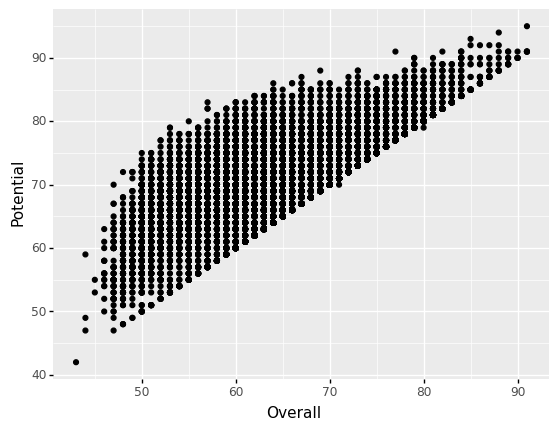

<ggplot: (8745945562709)>

In [74]:
ggplot(data=df)+geom_point(aes(x='Overall', y='Potential'))

`-` 뭔가 Potential > Overall 인 관계가 성립하는것 같다. $\to$ Potetial2 = Potential - Overall 인 변수를 새로 만들고 시각화해보자. 
- 판다스: 새로운열 추가

In [78]:
df.eval('Potentia2 = Potential - Overall').loc[:,['Potential',]]

,Weight,Release Clause,Kit Number,Best Overall Rating,Potentia2
0,82kg,€157M,8.0,NaN,1
1,69kg,€155M,8.0,NaN,1
2,69kg,€97.7M,19.0,NaN,0
3,70kg,€198.9M,17.0,NaN,0
4,68kg,€154.4M,23.0,NaN,3
...,...,...,...,...,...
17655,78kg,€218K,35.0,NaN,13
17656,84kg,€188K,21.0,NaN,16
17657,82kg,€142K,12.0,NaN,5
17658,79kg,€214K,40.0,NaN,15


In [110]:
fifa22['Potential_Delta'] = fifa22['Potential'] - fifa22['Overall']

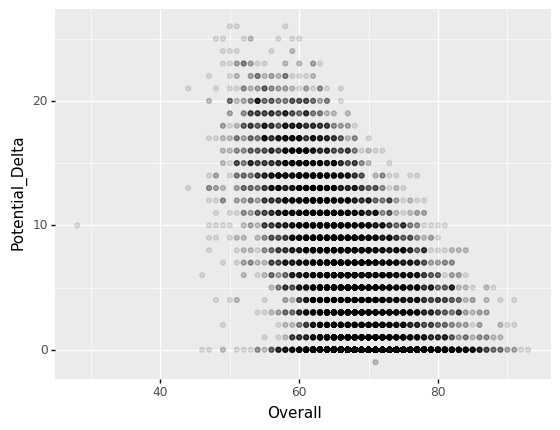

<ggplot: (8789310568869)>

In [112]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1)

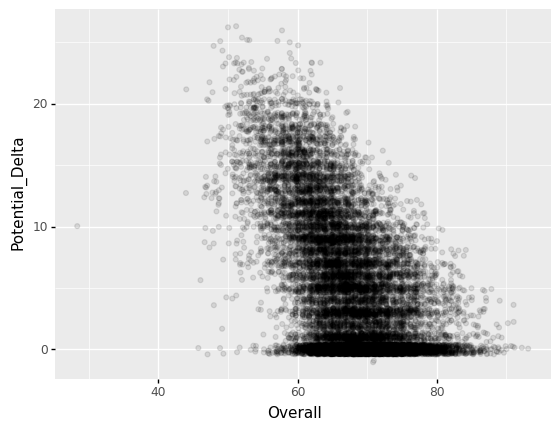

<ggplot: (8789315452065)>

In [113]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1,position='jitter')

`-` Potential_Delta가 너무 0근처인 선수들이 있다. (아마 은퇴한 선수가 아닐까?) $\to$ 제외하고 그리자. 

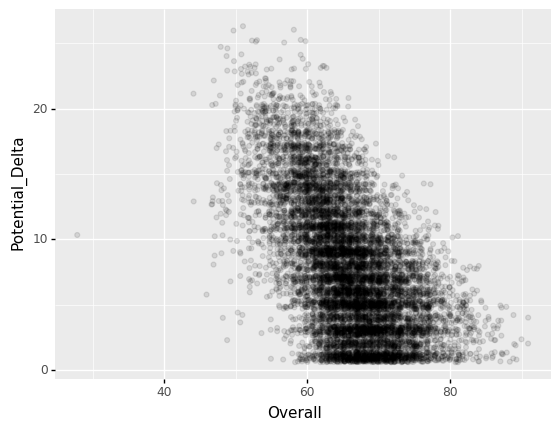

<ggplot: (8789315250289)>

In [114]:
ggplot(data=fifa22.query('Potential_Delta>0.1'))+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1,position='jitter')

`-` 해석 
- 해석1: 음의 상관관계가 있다. 
- 해석2: 오버올이 클수록 Potential_Delta의 분산이 작아진다. (오버올이 클수록 더 성장할 부분이 없으니까) 

### 데이터시각화: 산점도 + Boxplot

`-` Overall을 구간별로 나누자: 어느정도가 적당한 구간일까? 

In [32]:
df.Overall.describe()

count    17660.000000
mean        63.369592
std          8.036268
min         43.000000
25%         58.000000
50%         63.000000
75%         69.000000
max         91.000000
Name: Overall, dtype: float64

In [117]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

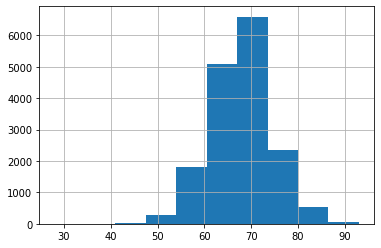

In [118]:
fifa22.Overall.hist()

In [119]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y 

In [120]:
fifa22['Q']=list(map(f,fifa22.Overall))
fifa22[['Q','Overall']]

,Q,Overall
0,Q1,93
1,Q1,92
2,Q1,91
3,Q1,91
4,Q1,91
...,...,...
16705,Q4,46
16706,Q4,46
16707,Q4,44
16708,Q4,44


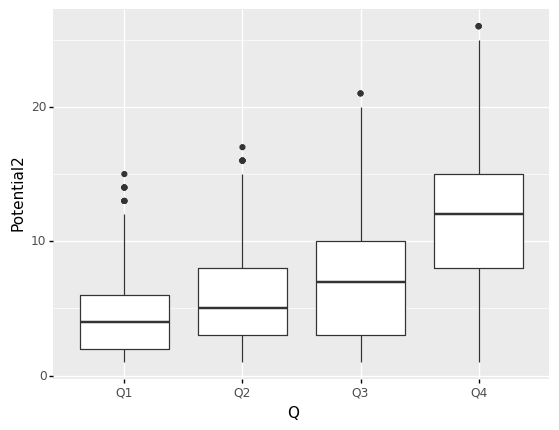

<ggplot: (8789310724501)>

In [121]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

`-` Q1으로 갈수록 분산이 작아짐! $\to$ 헷갈린다... 

`-` 산점도와 박스플랏을 겹쳐서 그린다면 좀더 이해가 쉬울것 같다. 

`-` x축의 위치를 조정하면 될것 같다 $\to$ Q1, Q2, Q3, Q4 각 그룹별로 x축의 위치를 구하자. 

In [122]:
fifa22.query('Q=="Q1"').Overall.mean()

76.3506528835691

- 이런식으로 해도 되지만 

In [123]:
fifa22.groupby(by='Q').mean().Overall

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

In [124]:
l=fifa22.groupby(by='Q').mean().Overall.to_list()
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx 라고 하자. 

In [125]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [126]:
fifa22['Qx']=list(map(g,fifa22.Q))

In [127]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Potential_Delta,Q,Qx
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,14.0,8.0,RW,93.0,€144.3M,20.0,0,0,Q1,76.350653
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,8.0,10.0,ST,92.0,€197.2M,35.0,0,0,Q1,76.350653
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,90.0,90.0,GK,91.0,€238M,27.0,2,2,Q1,76.350653
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,10.0,13.0,CM,91.0,€232.2M,68.0,0,0,Q1,76.350653
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,15.0,11.0,LW,91.0,€238.7M,35.0,0,0,Q1,76.350653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,13.0,6.0,CM,45.0,€47K,NaN,0,0,Q4,59.602691
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,14.0,11.0,CB,46.0,NaN,NaN,6,6,Q4,59.602691
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,20.0,20.0,CM,46.0,NaN,NaN,21,21,Q4,59.602691
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,9.0,7.0,CB,44.0,NaN,NaN,13,13,Q4,59.602691


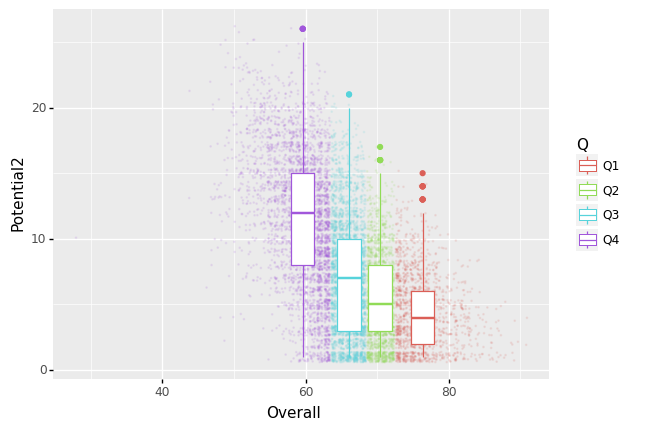

<ggplot: (8789309901365)>

In [128]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q'))

- 박스플랏의 중심이 낮아진다는 것은 음의 상관관계를 의미
- 박스플랏의 range가 작아진다는 것은 Overall이 증가할수록 Potential2의 분산이 작아짐을 의미

## Groupby

### flights data 

In [279]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


- https://github.com/PacktPublishing/Pandas-Cookbook/blob/master/data/descriptions/flights_description.csv

### get_groups

`-` groupby
- 데이터프레임을 여러개의 서브데이터프레임으로 나누는 기능 
- 단독으로 쓸 이유는 별로 없다. $\to$ 그룹을 나누고 어떠한 "연산"을 하기 위함

In [230]:
df.groupby(by='AIRLINE')

- 데이터프레임을 각 항공사 별로 나눔

`-` 확인

In [231]:
grouped = df.groupby(by='AIRLINE')

In [232]:
#collapse_output
grouped.groups

{'AA': [3, 6, 8, 15, 26, 32, 33, 36, 37, 41, 46, 47, 48, 55, 62, 66, 73, 75, 76, 87, 89, 97, 98, 107, 120, 122, 128, 131, 133, 146, 160, 171, 174, 178, 179, 188, 200, 201, 206, 221, 267, 270, 279, 305, 309, 311, 321, 330, 332, 342, 343, 347, 348, 380, 381, 382, 390, 393, 398, 402, 404, 405, 419, 427, 430, 431, 441, 449, 451, 455, 457, 466, 476, 491, 493, 497, 509, 514, 521, 527, 528, 537, 550, 551, 556, 560, 568, 572, 587, 589, 592, 612, 613, 618, 624, 626, 628, 634, 640, 652, ...], 'AS': [38, 198, 241, 277, 397, 450, 453, 500, 518, 591, 718, 737, 741, 808, 820, 867, 872, 1005, 1106, 1146, 1292, 1437, 1530, 1559, 1609, 1636, 1747, 1786, 1810, 1826, 1892, 1921, 2010, 2151, 2269, 2446, 2526, 2576, 2586, 2941, 3112, 3125, 3171, 3176, 3413, 3483, 3494, 3596, 3678, 3734, 3891, 3910, 3937, 3989, 4099, 4128, 4326, 4397, 4432, 4587, 4743, 4799, 4841, 4850, 4912, 4987, 5099, 5154, 5176, 5254, 5261, 5297, 5356, 5372, 5496, 5667, 5685, 5688, 5877, 5976, 6016, 6079, 6122, 6245, 6255, 6393, 6529, 6

- 너무 보기 힘듬 

`-` 보기 좋은 형태로 확인

In [233]:
grouped.groups.keys()

dict_keys(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN'])

In [234]:
grouped.get_group('AA')

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


In [235]:
#collapse_output
for key in grouped.groups.keys():
    print(key)
    display(grouped_df.get_group(key))

AA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


AS


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58305,12,30,3,AS,LAX,SEA,1325,-2.0,134.0,954,1608,-7.0,0,0
58355,12,31,4,AS,PHX,SEA,1200,-5.0,145.0,1107,1407,-24.0,0,0
58404,12,31,4,AS,SFO,SLC,2110,-2.0,80.0,599,2358,-4.0,0,0
58407,12,31,4,AS,SFO,PDX,645,-2.0,81.0,550,832,-3.0,0,0


B6


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
123,1,1,4,B6,LAS,BOS,1230,0.0,246.0,2381,2026,-27.0,0,0
127,1,1,4,B6,LAS,BOS,2359,68.0,247.0,2381,749,46.0,0,0
239,1,2,5,B6,ORD,BOS,540,-8.0,96.0,867,856,-22.0,0,0
333,1,3,6,B6,LAX,FLL,2237,32.0,270.0,2342,619,42.0,0,0
548,1,4,7,B6,SFO,FLL,2307,-4.0,298.0,2583,724,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58262,12,30,3,B6,SFO,LGB,1921,-6.0,57.0,354,2038,-14.0,0,0
58301,12,30,3,B6,LAX,JFK,630,4.0,285.0,2475,1445,-6.0,0,0
58425,12,31,4,B6,ORD,SJU,700,239.0,250.0,2072,1335,239.0,0,0
58477,12,31,4,B6,DFW,BOS,1145,12.0,161.0,1562,1608,-14.0,0,0


DL


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
53,1,1,4,DL,LAS,MSP,713,-5.0,156.0,1299,1220,-18.0,0,0
57,1,1,4,DL,MSP,RSW,700,-1.0,169.0,1416,1130,-20.0,0,0
77,1,1,4,DL,LAX,ATL,1130,24.0,217.0,1947,1840,16.0,0,0
79,1,1,4,DL,LAX,CMH,2146,-3.0,223.0,1995,459,-13.0,0,0
85,1,1,4,DL,ATL,OKC,2059,-4.0,116.0,761,2227,-12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58440,12,31,4,DL,ATL,CVG,1611,-4.0,61.0,373,1736,-6.0,0,0
58448,12,31,4,DL,ATL,SRQ,1610,0.0,61.0,444,1740,-13.0,0,0
58464,12,31,4,DL,LAX,SFO,700,108.0,54.0,337,825,105.0,0,0
58467,12,31,4,DL,ATL,IND,1235,-3.0,63.0,432,1407,-13.0,0,0


EV


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
11,1,1,4,EV,ORD,JAN,1155,6.0,113.0,677,1403,5.0,0,0
13,1,1,4,EV,ORD,CMH,1010,-2.0,46.0,296,1228,-9.0,0,0
29,1,1,4,EV,ORD,IND,1025,-6.0,29.0,177,1228,-19.0,0,0
40,1,1,4,EV,IAH,CLE,1038,-3.0,126.0,1091,1425,-18.0,0,0
69,1,1,4,EV,ATL,RAP,1930,-5.0,181.0,1230,2104,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58445,12,31,4,EV,DFW,TXK,850,-5.0,30.0,181,948,-17.0,0,0
58452,12,31,4,EV,DFW,SHV,1650,-4.0,32.0,190,1746,-12.0,0,0
58459,12,31,4,EV,MSP,ORD,1435,18.0,61.0,334,1609,3.0,0,0
58463,12,31,4,EV,ORD,MSN,1220,18.0,32.0,108,1319,27.0,0,0


F9


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
7,1,1,4,F9,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
93,1,1,4,F9,ATL,DEN,859,16.0,181.0,1199,1026,10.0,0,0
209,1,2,5,F9,MSP,DEN,1025,-6.0,97.0,680,1134,-13.0,0,0
232,1,2,5,F9,DEN,PHX,2040,-7.0,83.0,602,2228,-18.0,0,0
247,1,2,5,F9,ORD,ATL,730,10.0,86.0,606,1020,23.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58288,12,30,3,F9,DEN,ORD,625,-4.0,136.0,888,1000,14.0,0,0
58331,12,30,3,F9,ORD,PHX,825,18.0,207.0,1440,1127,14.0,0,0
58447,12,31,4,F9,DEN,LAS,1245,13.0,94.0,628,1340,13.0,0,0
58449,12,31,4,F9,DEN,MCO,645,11.0,169.0,1546,1224,-11.0,0,0


HA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
582,1,4,7,HA,LAX,OGG,1115,-11.0,310.0,2486,1500,-27.0,0,0
712,1,5,1,HA,LAS,HNL,900,-5.0,357.0,2762,1315,5.0,0,0
878,1,6,2,HA,PHX,HNL,800,1.0,374.0,2917,1140,3.0,0,0
1053,1,7,3,HA,LAX,HNL,1705,0.0,332.0,2556,2055,-2.0,0,0
1269,1,8,4,HA,LAX,HNL,1000,-1.0,335.0,2556,1350,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55883,12,16,3,HA,LAX,HNL,835,1.0,314.0,2556,1235,-18.0,0,0
56174,12,18,5,HA,LAX,HNL,835,-5.0,342.0,2556,1235,-4.0,0,0
56350,12,19,6,HA,PHX,HNL,800,-5.0,363.0,2917,1155,-34.0,0,0
56816,12,21,1,HA,LAX,LIH,740,20.0,303.0,2615,1145,-11.0,0,0


MQ


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
10,1,1,4,MQ,DFW,DRO,1335,28.0,104.0,674,1438,28.0,0,0
18,1,1,4,MQ,ORD,DAY,2220,19.0,37.0,240,23,20.0,0,0
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
50,1,1,4,MQ,ORD,CID,1135,-7.0,37.0,196,1238,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58415,12,31,4,MQ,ORD,FWA,845,-2.0,37.0,157,1045,-4.0,0,0
58426,12,31,4,MQ,DFW,FAR,1154,4.0,124.0,968,1437,-13.0,0,0
58468,12,31,4,MQ,DFW,OKC,1720,-3.0,31.0,175,1819,-10.0,0,0
58474,12,31,4,MQ,ORD,FNT,829,4.0,40.0,223,1034,-4.0,0,0


NK


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
17,1,1,4,NK,DEN,DTW,1952,37.0,124.0,1123,31,54.0,0,0
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0
95,1,1,4,NK,LAS,OAK,1115,22.0,62.0,407,1246,10.0,0,0
109,1,1,4,NK,MSP,ORD,616,2.0,49.0,334,745,-19.0,0,0
166,1,2,5,NK,LAS,PDX,1535,-8.0,123.0,763,1754,-4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58160,12,29,2,NK,MSP,MCO,740,0.0,171.0,1310,1158,33.0,0,0
58197,12,30,3,NK,IAH,ORD,755,-8.0,136.0,925,1030,-2.0,0,0
58437,12,31,4,NK,ORD,DFW,1952,15.0,135.0,802,2225,23.0,0,0
58461,12,31,4,NK,ORD,LGA,1801,-5.0,84.0,733,2109,-26.0,0,0


OO


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
12,1,1,4,OO,ORD,MSP,1510,2.0,65.0,334,1646,4.0,0,0
16,1,1,4,OO,DEN,SGU,1105,21.0,66.0,517,1249,20.0,0,0
22,1,1,4,OO,LAS,LAX,1544,-4.0,39.0,236,1655,-12.0,0,0
25,1,1,4,OO,ORD,SPI,2110,-4.0,31.0,174,2205,5.0,0,0
27,1,1,4,OO,IAH,JAC,1104,-1.0,161.0,1265,1316,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58451,12,31,4,OO,ATL,FWA,1905,-3.0,72.0,508,2051,-14.0,0,0
58480,12,31,4,OO,MSP,BIS,1310,-2.0,65.0,386,1449,-9.0,0,0
58482,12,31,4,OO,DEN,CPR,1850,-2.0,38.0,230,1956,1.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0


UA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
5,1,1,4,UA,IAH,SAN,1450,1.0,178.0,1303,1620,-14.0,0,0
9,1,1,4,UA,IAH,SJC,925,3.0,215.0,1608,1136,-14.0,0,0
14,1,1,4,UA,IAH,IND,1426,-1.0,102.0,844,1742,-20.0,0,0
21,1,1,4,UA,ORD,CLE,2102,48.0,47.0,315,2320,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,12,31,4,UA,DEN,SAN,1535,0.0,124.0,853,1704,-13.0,0,0
58432,12,31,4,UA,ORD,SAN,1915,7.0,238.0,1723,2143,-3.0,0,0
58457,12,31,4,UA,ORD,LAX,659,-1.0,241.0,1744,946,0.0,0,0
58460,12,31,4,UA,SFO,PHL,2235,-6.0,265.0,2521,700,-42.0,0,0


US


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
31,1,1,4,US,PHX,DEN,1810,29.0,94.0,602,1954,49.0,0,0
35,1,1,4,US,ORD,PHL,1600,-2.0,80.0,678,1857,-9.0,0,0
49,1,1,4,US,IAH,PHX,1445,-1.0,147.0,1009,1638,-7.0,0,0
96,1,1,4,US,ATL,PHL,1445,-4.0,90.0,666,1644,-11.0,0,0
104,1,1,4,US,MSP,PHX,730,-3.0,174.0,1276,1010,-20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31514,6,30,2,US,DEN,PHL,705,-4.0,188.0,1558,1240,1.0,0,0
31523,6,30,2,US,PHX,DEN,1451,6.0,85.0,602,1738,7.0,0,0
31535,6,30,2,US,PHX,AUS,840,-3.0,116.0,872,1304,-11.0,0,0
31561,6,30,2,US,ORD,PHX,710,-5.0,170.0,1440,901,-50.0,0,0


VX


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
56,1,1,4,VX,LAS,SFO,900,23.0,65.0,414,1035,11.0,0,0
227,1,2,5,VX,SFO,LAS,1220,-5.0,68.0,414,1350,-5.0,0,0
243,1,2,5,VX,SFO,SEA,700,-4.0,104.0,679,905,-1.0,0,0
417,1,3,6,VX,SFO,LAS,900,-2.0,62.0,414,1030,-11.0,0,0
432,1,3,6,VX,SFO,SEA,2035,-2.0,106.0,679,2240,-2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58332,12,30,3,VX,SFO,LAS,1950,-3.0,58.0,414,2120,-4.0,0,0
58383,12,31,4,VX,SFO,PSP,1630,-7.0,65.0,421,1755,-12.0,0,0
58400,12,31,4,VX,SFO,LAX,1125,-4.0,54.0,337,1245,-10.0,0,0
58471,12,31,4,VX,SFO,LAX,700,6.0,51.0,337,820,3.0,0,0


WN


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
19,1,1,4,WN,PHX,LAX,1640,51.0,58.0,370,1700,59.0,0,0
20,1,1,4,WN,ATL,BWI,1115,1.0,76.0,577,1305,-15.0,0,0
23,1,1,4,WN,ATL,HOU,1555,30.0,113.0,696,1720,18.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58455,12,31,4,WN,LAX,SMF,1420,-2.0,64.0,373,1540,-7.0,0,0
58458,12,31,4,WN,LAS,SFO,1825,25.0,67.0,414,1955,17.0,0,0
58472,12,31,4,WN,PHX,HOU,845,5.0,119.0,1020,1210,7.0,0,0
58473,12,31,4,WN,DEN,PDX,1205,4.0,130.0,991,1400,-13.0,0,0


### 범주형 변수를 기준으로 groupby

#### `#` ***EX1: [AIRLINE] $\to$ {ARR_DELAY: mean}***

`-` 방법1: groupby() $\to$ agg({col:f})

(예시1) $\star\star\star$

In [237]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':np.mean})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


(예시2)

In [236]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법2: groupby() $\to$ key로 column선택 $\to$ .agg(f), .f()

(예시1)

In [239]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(np.mean)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

(예시2)

In [246]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg('mean')

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

(예시3)

In [248]:
df.groupby(by='AIRLINE')['ARR_DELAY'].mean()

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

#### `#` ***EX2: [AIRLINE,WEEKDAY]  $\to$  {CANCELLED: sum}***

`-` 방법1

(예시1)

In [53]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':np.sum})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

(예시2)

In [249]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':'sum'})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

`-` 방법2

(예시1)

In [55]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg(np.sum)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

(예시2)

In [54]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg('sum')

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

(예시3)

In [57]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].sum()

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

#### `#` ***EX3: [AIRLINE,WEEKDAY] $\to$ {CANCELLED: sum, mean} , {DIVERTED: sum, mean}***

`-` 방법1

(예시1)

In [60]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':[np.sum,np.mean],'DIVERTED':[np.sum,np.mean]})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

(예시2)

In [59]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean'],'DIVERTED':['sum','mean']})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

`-` 방법2

(예시1)

In [62]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg([np.sum,np.mean])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

(예시2)

In [61]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg(['sum','mean'])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [250]:
# df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED','DIVERTED'].sum() ?? 

#### `#` ***EX4: [AIRLINE,WEEKDAY] $\to$ {CANCELLED: sum, mean, size} , {AIR_TIME: mean,var}***

`-` 방법1만 가능 

(예시1)

In [252]:
df.groupby(by=['AIRLINE','WEEKDAY'])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,np.var]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

*사용자정의함수를 사용해도 가능(예시를 위한것일 뿐 굳이 저렇게 구할 필요는 없음)*

In [75]:
df.groupby(by=['AIRLINE','WEEKDAY'])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,lambda x: np.std(x,ddof=1)**2]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean   <lambda_0>
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

(예시2)

In [65]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean','size'],'AIR_TIME':['mean','var']})

CANCELLED                    AIR_TIME             
                      sum      mean  size        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

### 연속형 변수를 기준으로 groupby

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,58482,58483,58484,58485,58486,58487,58488,58489,58490,58491
MONTH,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
DAY,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
WEEKDAY,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
AIRLINE,WN,UA,MQ,AA,WN,UA,AA,F9,AA,UA,...,OO,B6,MQ,DL,EV,AA,F9,OO,WN,OO
ORG_AIR,LAX,DEN,DFW,DFW,LAX,IAH,DFW,SFO,ORD,IAH,...,DEN,PHX,ORD,ATL,DFW,SFO,LAS,SFO,MSP,SFO
DEST_AIR,SLC,IAD,VPS,DCA,MCI,SAN,MSY,PHX,STL,SJC,...,CPR,BOS,DSM,CMH,LFT,DFW,SFO,SBA,ATL,BOI
SCHED_DEP,1625,823,1305,1555,1720,1450,1250,1020,1845,925,...,1850,2236,1333,2206,850,515,1910,1846,525,859
DEP_DELAY,58.0,7.0,36.0,7.0,48.0,1.0,84.0,-7.0,-5.0,3.0,...,-2.0,-12.0,1.0,2.0,21.0,5.0,13.0,-6.0,39.0,5.0
AIR_TIME,94.0,154.0,85.0,126.0,166.0,178.0,64.0,91.0,44.0,215.0,...,38.0,231.0,57.0,64.0,52.0,166.0,71.0,46.0,124.0,73.0
DIST,590,1452,641,1192,1363,1303,447,651,258,1608,...,230,2300,299,447,351,1464,414,262,907,522


`-` 목표: DIST를 적당한 구간으로 나누어 카테고리화 하고 그것을 바탕으로 groupby를 수행하자. 

<AxesSubplot:>

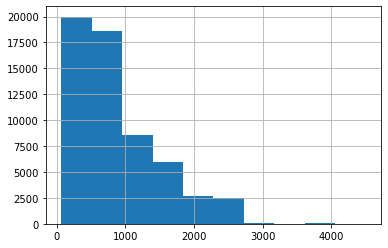

In [280]:
df.DIST.hist()

In [281]:
df.DIST.describe()

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

`-` 구간을 아래와 같이 설정한다. 

In [289]:
bins=[-np.inf, 400, 700, 1200, np.inf] 

`-` pd.cut()을 이용하여 각 구간의 obs를 카테고리화 하자. 

In [290]:
cuts=pd.cut(df.DIST,bins=bins)
cuts

0         (400.0, 700.0]
1          (1200.0, inf]
2         (400.0, 700.0]
3        (700.0, 1200.0]
4          (1200.0, inf]
              ...       
58487      (1200.0, inf]
58488     (400.0, 700.0]
58489      (-inf, 400.0]
58490    (700.0, 1200.0]
58491     (400.0, 700.0]
Name: DIST, Length: 58492, dtype: category
Categories (4, interval[float64, right]): [(-inf, 400.0] < (400.0, 700.0] < (700.0, 1200.0] < (1200.0, inf]]

`-` cuts, AIRLINE $\to$ {DIVERTED: sum}

In [291]:
df.groupby([cuts,'AIRLINE']).agg({'DIVERTED':sum})

DIVERTED
DIST            AIRLINE          
(-inf, 400.0]   AA              0
                AS              0
                B6              0
                DL              1
                EV              3
                F9              0
                HA              0
                MQ              0
                NK              0
                OO              5
                UA              2
                US              0
                VX              0
                WN              1
(400.0, 700.0]  AA              3
                AS              0
                B6              0
                DL             12
                EV              8
                F9              1
                HA              0
                MQ              4
                NK              1
                OO              7
                UA              1
                US              0
                VX              0
                WN              2
(700.0, 1200.0] AA             10
                AS              0
                B6              1
                DL              6
                EV              4
                F9              0
                HA              0
                MQ              1
                NK              1
                OO              5
                UA              4
                US              0
                VX              0
                WN              4
(1200.0, inf]   AA             13
                AS              0
                B6              1
                DL              5
                EV              0
                F9              1
                HA              1
                MQ              0
                NK              3
                OO              4
                UA             12
                US              1
                VX              1
                WN              8

`-` 아래와 비교해보자. 

In [292]:
df.groupby(['AIRLINE']).agg({'DIVERTED':sum})

,DIVERTED
AIRLINE,
AA,26
AS,0
B6,2
DL,24
EV,15
F9,2
HA,1
MQ,5
NK,5


`-` cuts을 이용하여 추가그룹핑을 하면 조금 다른 특징들을 데이터에서 발견할 수 있다. 
- AA항공사와 DL항공사는 모두 비슷한 우회횟수를 가지고 있음. 
- AA항공사는 700회이상의 구간에서 우회를 많이하고 DL항공사는 400~700사이에서 우회를 많이 한다. (패턴이 다름) 

`-` 구간이름에 label을 붙이는 방법 

In [293]:
bins

[-inf, 400, 700, 1200, inf]

In [297]:
cuts2=pd.cut(df.DIST,bins=bins,labels=['~400','400~700','700~1200','1200~'])
cuts2

0         400~700
1           1200~
2         400~700
3        700~1200
4           1200~
           ...   
58487       1200~
58488     400~700
58489        ~400
58490    700~1200
58491     400~700
Name: DIST, Length: 58492, dtype: category
Categories (4, object): ['~400' < '400~700' < '700~1200' < '1200~']

In [298]:
df.groupby(by=[cuts2,'AIRLINE']).agg({'DIVERTED':sum})

DIVERTED
DIST     AIRLINE          
~400     AA              0
         AS              0
         B6              0
         DL              1
         EV              3
         F9              0
         HA              0
         MQ              0
         NK              0
         OO              5
         UA              2
         US              0
         VX              0
         WN              1
400~700  AA              3
         AS              0
         B6              0
         DL             12
         EV              8
         F9              1
         HA              0
         MQ              4
         NK              1
         OO              7
         UA              1
         US              0
         VX              0
         WN              2
700~1200 AA             10
         AS              0
         B6              1
         DL              6
         EV              4
         F9              0
         HA              0
         MQ              1
         NK              1
         OO              5
         UA              4
         US              0
         VX              0
         WN              4
1200~    AA             13
         AS              0
         B6              1
         DL              5
         EV              0
         F9              1
         HA              1
         MQ              0
         NK              3
         OO              4
         UA             12
         US              1
         VX              1
         WN              8

In [299]:
df.groupby(cuts2).agg({'DIVERTED':sum})

,DIVERTED
DIST,
~400,12
400~700,39
700~1200,36
1200~,50


## Make tidy data 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html
- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1 (tidy data) 

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2 (tidy data x)

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



### 예제 

`-` https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv

#### 풀이1: stack + reset_index  

`-` 문제의 깃헙주소로 들어가서 데이터를 관찰 $\to$ 좌측상단이 비워져있음 $\to$ `index_col=0` 옵션을 사용 

In [304]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv',index_col=0)
df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16


In [302]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df=pd.read_csv(url,index_col=0)
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


`-` 데이터변형

In [305]:
df.stack()

Date            
2019-10  Samsung    461
         Apple      324
         Huawei     136
         Xiaomi     109
         Oppo        76
                   ... 
2020-10  Nokia       20
         Lenovo      22
         OnePlus      9
         Sony        22
         Asus        21
Length: 208, dtype: int64

In [306]:
df.stack().reset_index()

,Date,level_1,0
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


In [307]:
df.stack().reset_index().rename(columns={'level_0':'group1','level_1':'group2',0:'X'})

,Date,group2,X
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


#### 풀이2: melt(id_vars=??)

`-` `index_col=0` 옵션을 사용하지않음 

In [308]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df2=pd.read_csv(url)
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [309]:
df2.rename(columns={'Unnamed: 0':'group1'})

,group1,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [310]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')

,group1,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [311]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')\
.rename(columns={'variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 틀린풀이1

In [312]:
df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16


In [313]:
df.melt()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


#### 틀린풀이2

In [314]:
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [315]:
df2.stack()

0  Unnamed: 0      Texas
   Apple              12
   Orange             10
   Banana             40
1  Unnamed: 0    Arizona
   Apple               9
   Orange              7
   Banana             12
2  Unnamed: 0    Florida
   Apple               0
   Orange             14
   Banana            190
dtype: object

#### 풀이3 

In [316]:
df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16


In [317]:
df.reset_index()

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [318]:
df.reset_index().melt(id_vars='index')

KeyError: 'index'

In [70]:
df.reset_index().melt(id_vars='index')\
.rename(columns={'index':'group1','variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 풀이4

In [78]:
df2.set_index('Unnamed: 0')

,Apple,Orange,Banana
Unnamed: 0,,,
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [79]:
df2.set_index('Unnamed: 0').stack()

Unnamed: 0        
Texas       Apple      12
            Orange     10
            Banana     40
Arizona     Apple       9
            Orange      7
            Banana     12
Florida     Apple       0
            Orange     14
            Banana    190
dtype: int64

In [80]:
df2.set_index('Unnamed: 0').stack().reset_index()

,Unnamed: 0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [81]:
df2.set_index('Unnamed: 0').stack().reset_index()\
.rename(columns={'Unnamed: 0':'group1','level_1':'group2',0:'X'})

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


## Barplot + 해들리위컴의 그래프레이어 

### 기본사용법

In [85]:
g=['A']*100+['B']*200 
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)
df=pd.DataFrame({'g':g,'y':y})
df

,g,y
0,A,-1.594055
1,A,1.225490
2,A,2.223234
3,A,1.842460
4,A,1.624541
...,...,...
295,B,3.011681
296,B,3.558141
297,B,4.348230
298,B,3.966407


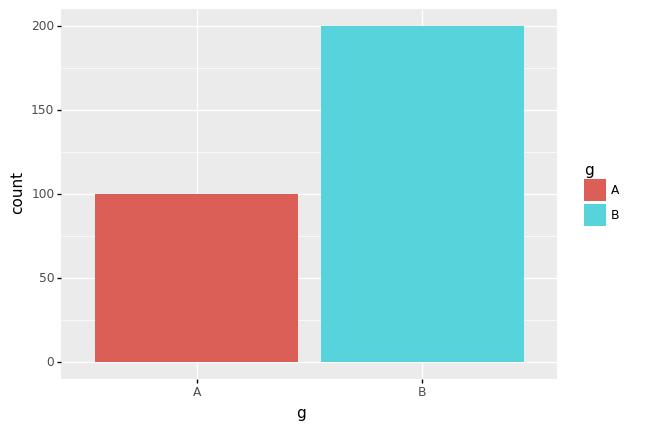

<ggplot: (8726962443840)>

In [89]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌

`-` 이것은 아래의 코드와 같다. 

In [93]:
df.groupby(by='g').count()

,y
g,
A,100
B,200


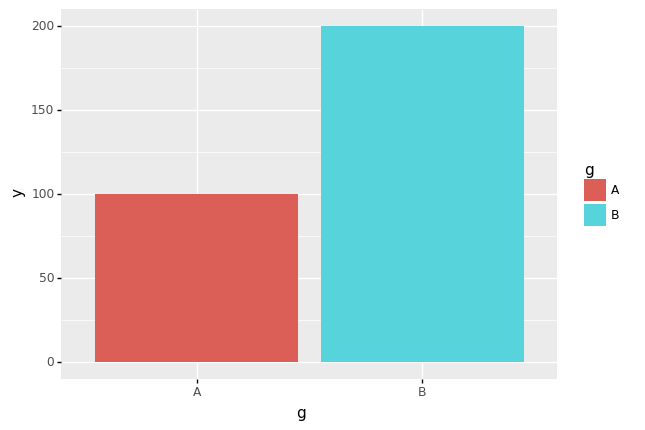

<ggplot: (8726962432681)>

In [98]:
fig=ggplot(df.groupby(by='g').count().reset_index())
fig+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')

`-` barplot은 기본적으로 groupby+count()가 내장되어 있다. 따라서 아래의 코드 

```r
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌
```

를 좀더 엄밀하게 쓰면 

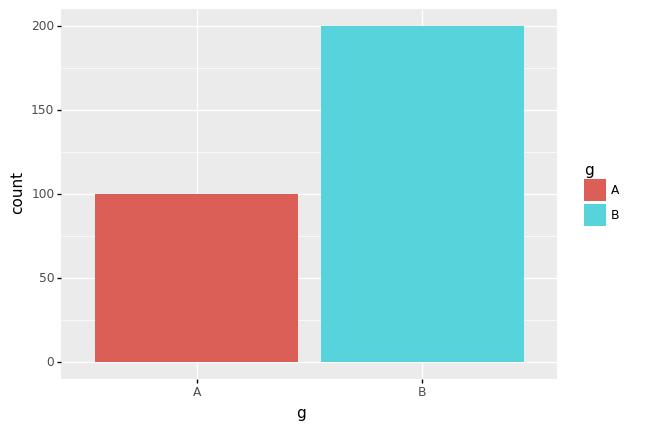

<ggplot: (8726962477975)>

In [100]:
ggplot(df)+geom_bar(aes(x='g',fill='g'),stat='count') 

`-` 이것은 때때로 불편하다. 왜냐하면 데이터프레임을 변환하는 것은 판다스를 이용하는게 더 쉽고 자유로움 

### barplot의 불편한점1

In [108]:
td=df.groupby(by='g').count().reset_index()
td

,g,y
0,A,100
1,B,200


`-` 그냥 'x=g, y=y'를 맵핑하여 그리면 안되나? 

<BarContainer object of 2 artists>

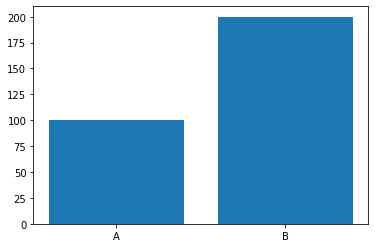

In [117]:
plt.bar(td.g,td.y)

<AxesSubplot:xlabel='g'>

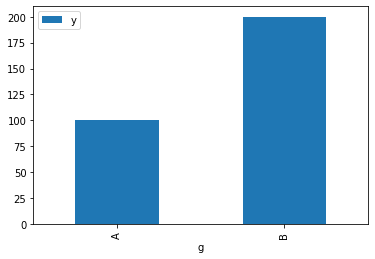

In [118]:
td.plot(kind='bar',x='g',y='y')

`-` 그런데 ggplot을 쓰려고 하면?

In [119]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g')) 

PlotnineError: 'stat_count() must not be used with a y aesthetic'

- 너무 불편해요.. stat='identity' 를 항상 써야하는것이!

### barplot의 불편한점2

`-` groupby 를 자동으로 해주므로 익숙해지면 ggplot2 방식이 더 편하지 않을까? $\to$ groupby 하는게 더 편해요.. 

In [122]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})

y                               
       mean    median       std <lambda_0>
g                                         
A  1.805694  1.960777  2.060555  10.166683
B  2.900715  2.906418  1.004063   5.174041

In [142]:
df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

,g,level_1,y
0,A,mean,1.805694
1,A,median,1.960777
2,A,range,10.166683
3,A,std,2.060555
4,B,mean,2.900715
5,B,median,2.906418
6,B,range,5.174041
7,B,std,1.004063


In [146]:
td=df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

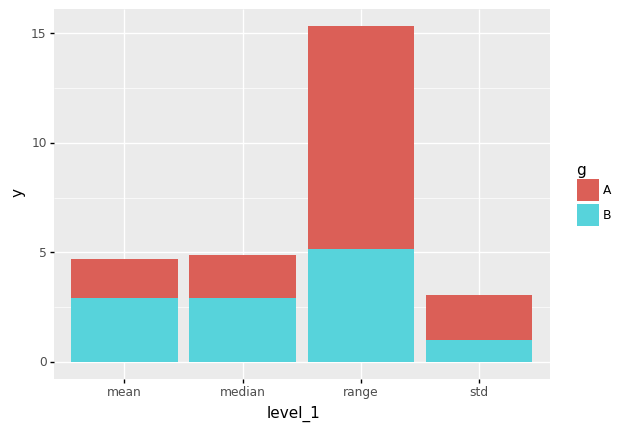

<ggplot: (8726959187327)>

In [152]:
ggplot(td)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity')

- 쌓인상태로 보이는것이 불편함. $\to$ position='dodge' 로!

### position 

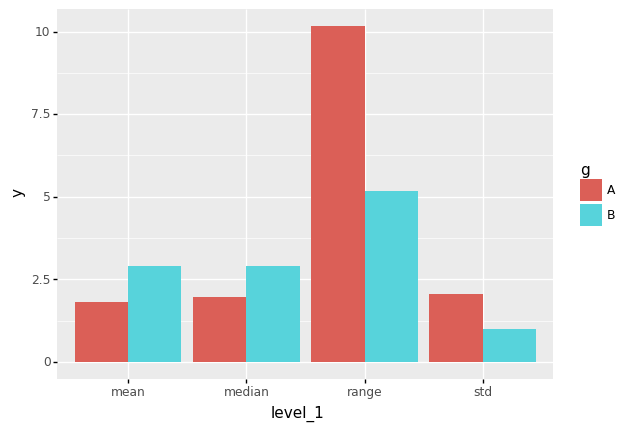

<ggplot: (8726958675716)>

In [151]:
ggplot(td)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')

### coord_flip()

`-` 때때로 아래와 같이 보는 것이 더 좋은 경우도 있음 

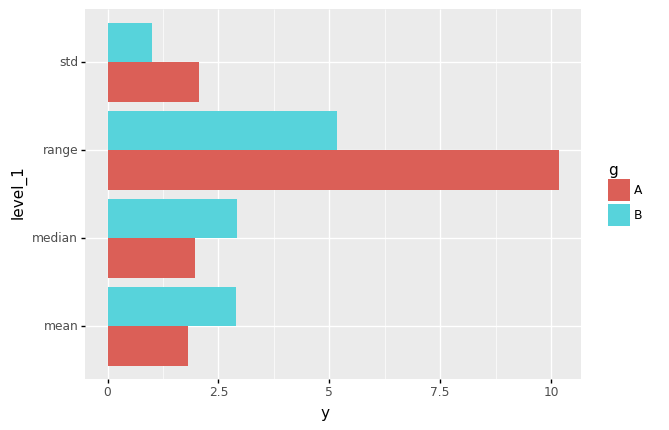

<ggplot: (8726962202191)>

In [154]:
ggplot(td)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()

### facet_wrap()

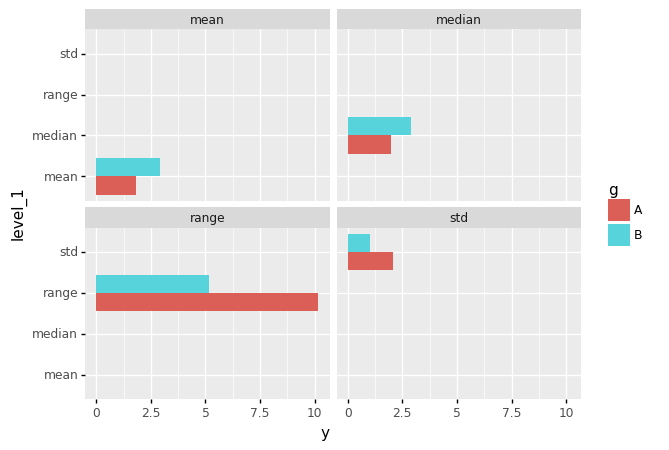

<ggplot: (8726962596675)>

In [156]:
ggplot(td)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

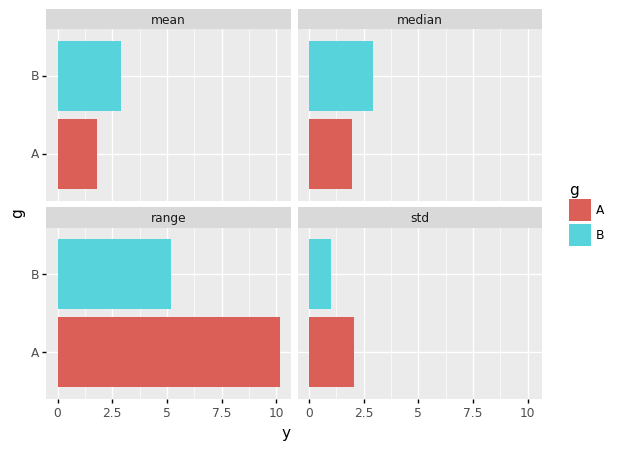

<ggplot: (8726958748290)>

In [158]:
ggplot(td)\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

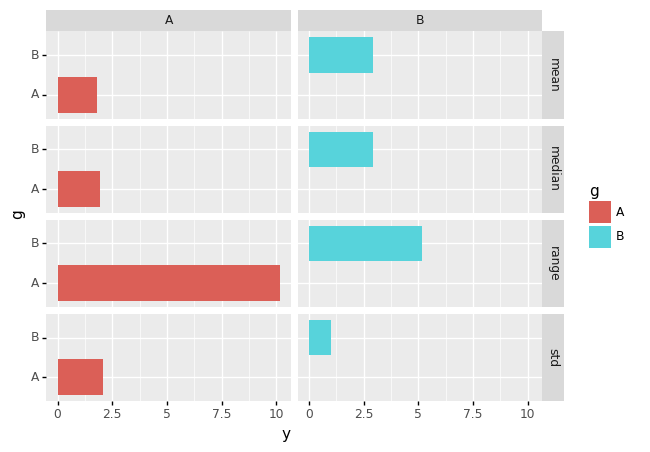

<ggplot: (8726962231423)>

In [165]:
ggplot(td)+facet_grid('level_1~g')\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')+coord_flip()

### 해들리위컴의 그래프레이어

`-` 데이터셋 + 맵핑 + 지옴 + 포지션 + 스탯 + 축 + 면분할 
- 데이터셋: 판다스 
- 맵핑: x축, y축, 색깔, 크기, 투명도 
- 지옴: 포인트지옴, 바지옴, 라인지옴, 스무스지옴 
- 포지션: jitter, dodge, intentity 
- 스탯: identity, count 
- 축: coord_flip()
- 면분할: facet_wrap(), facet_grid()

## 심슨의 역설

In [168]:
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2 
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=[1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1]

In [169]:
df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})

In [170]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [172]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

### 시각화1: 전체합격률

In [177]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [178]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [179]:
df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index()

,GEN,COUNT
0,F,40
1,M,220


`-` 두개의 데이터프레임을 합쳐야 한다. 

In [226]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()
_df2=df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index().rename(columns={'COUNT':'SUM'})

In [227]:
display(_df1)
display(_df2)

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


,GEN,SUM
0,F,40
1,M,220


`-` 단순한 방법

In [228]:
def f(x): 
    if x=='F':
        return 40 
    if x=='M':
        return 220 

In [229]:
_df1['SUM']=list(map(f,_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 좀 더 좋은 방법 

In [230]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

In [231]:
def f(_df2): 
    return lambda x: _df2.query('GEN == @x').SUM.item()

In [232]:
_df1.GEN

0    F
1    F
2    M
3    M
Name: GEN, dtype: object

In [233]:
_df1['SUM']=list(map(f(_df2),_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 더 좋은 방법

In [234]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1을 다시 롤백

In [236]:
_df1

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [237]:
_df2

,GEN,SUM
0,F,40
1,M,220


In [235]:
pd.merge(_df1,_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [239]:
_df1.merge(_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [240]:
_df2.merge(_df1)

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [244]:
td=_df2.merge(_df1)
td

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [245]:
td['PROP']=td.COUNT/td.SUM

In [246]:
td

,GEN,SUM,STATE,COUNT,PROP
0,F,40,FAIL,12,0.300000
1,F,40,PASS,28,0.700000
2,M,220,FAIL,52,0.236364
3,M,220,PASS,168,0.763636


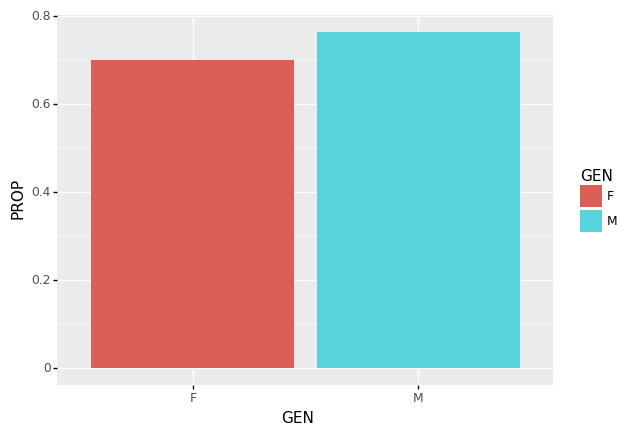

<ggplot: (8726958443650)>

In [249]:
ggplot(td.query('STATE=="PASS"'))+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')

`-` 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2: 학과별 합격률

`-` 학과별 합격률 

In [281]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [286]:
td=df.groupby(['DEP','GEN']).agg({'COUNT':sum}).reset_index()\
.rename(columns={'COUNT':'SUM'}).merge(df)

In [288]:
td['PROP']=td.COUNT/td.SUM

In [289]:
td

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
1,A1,F,10,FAIL,5,0.50
2,A1,M,10,PASS,1,0.10
3,A1,M,10,FAIL,9,0.90
4,A2,F,10,PASS,5,0.50
5,A2,F,10,FAIL,5,0.50
6,A2,M,10,PASS,2,0.20
7,A2,M,10,FAIL,8,0.80
8,B1,F,10,PASS,9,0.90
9,B1,F,10,FAIL,1,0.10


In [290]:
td.query('STATE=="PASS"')

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
2,A1,M,10,PASS,1,0.10
4,A2,F,10,PASS,5,0.50
6,A2,M,10,PASS,2,0.20
8,B1,F,10,PASS,9,0.90
10,B1,M,100,PASS,80,0.80
12,B2,F,10,PASS,9,0.90
14,B2,M,100,PASS,85,0.85


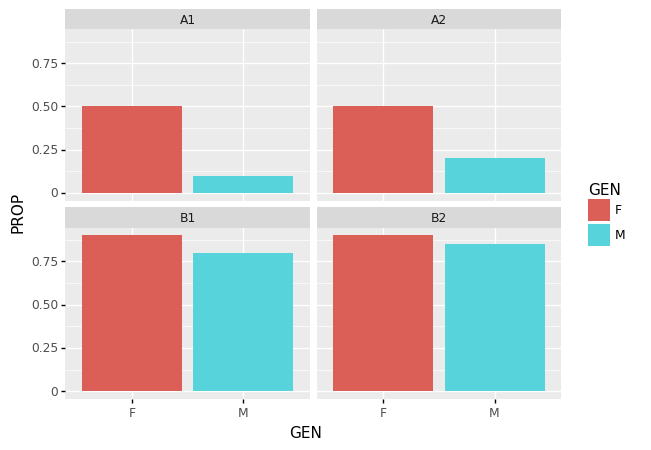

<ggplot: (8726962449285)>

In [293]:
ggplot(td.query('STATE=="PASS"'))\
+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')\
+facet_wrap('DEP')